# 線形回帰、SVM演習の答え

## 演習問題1

In [1]:
import pandas as pd
df = pd.read_csv("house.csv")#住宅データを読み込む
#学習用データとテスト用データへの分割
from sklearn.model_selection import train_test_split

X = df.iloc[:,2:].values#説明変数は価格と日付以外。目的変数は価格
y = df.iloc[:,1].values

train_X,test_X,train_y,test_y = train_test_split(X,y)#75％を学習用データ、25%を検証用データとする
#df.head()

In [2]:
#Lasso回帰学習フェーズ
from sklearn import linear_model

rgs = linear_model.Lasso(alpha=1.0,max_iter=500,random_state=0) #ハイパーパラメータ設定
rgs.fit(train_X, train_y) #説明変数と目的変数の関係を学習.
print("train score:",rgs.score(train_X,train_y))
print("test score:",rgs.score(test_X,test_y))

train score: 0.5890139761457873
test score: 0.5699991025807785


## 演習問題2

In [3]:
#説明変数はグレードと日付以外。目的変数はグレード

X = df.drop(["grade","date"],axis=1).values#説明変数は価格と日付以外。目的変数は価格
y = df["grade"].values
train_X,test_X,train_y,test_y = train_test_split(X,y)#75％を学習用データ、25%を検証用データとする

In [4]:
#正規化する関数（標準化、平均0分散1に変換）
def standardization(x, axis=0, ddof=1):
    x_mean = x.mean(axis=axis)
    x_std = x.std(axis=axis,ddof=ddof)
    return (x - x_mean) / x_std

##正規化(標準化)
train_X = standardization(train_X)
test_X = standardization(test_X)

#SVM学習フェーズ
from sklearn import svm#サポートベクターマシーン読み込み

clf = svm.SVC(gamma='auto')#分類器の生成
clf.fit(train_X, train_y) #説明変数と目的変数の関係を学習

#SVM予測フェーズ
pred_Y = clf.predict(test_X)#学習済み分類器を用いて予測

#accuracyを計算
print("train score:",clf.score(train_X,train_y))
print("test_score:",clf.score(test_X,test_y))

train score: 0.6626666666666666
test_score: 0.602


## 最終問題
以下の条件を満たすプログラムを実装せよ


1. 説明変数から”price”を取り除き、”grade”を追加せよ。

1. priceを正規化せよ。

1. PCAを行い2次元に圧縮し、プロットせよ。

1. （おまけ）PCA_arrayで各主成分の値を出力する際、priceが0.1未満のデータは”Low price”として赤点、0.1以上0.2以下の場合は”Normal price”として緑点、0.2より大きい場合は”High price”として青点を出力せよ。

In [5]:
#2次元のデータフレームを正規化する関数
def min_max_df(x):
    result_array = np.zeros((x.shape), float)
    for i in range(x.shape[1]):
        min = np.min(x.iloc[:, i])
        max = np.max(x.iloc[:, i])
        result_array[:,i] = (x.iloc[:, i]-min)/(max-min)
    return result_array

#2次元のnumpy配列を正規化する関数
def min_max(x):
    min = np.min(x)
    max = np.max(x)
    result = (x-min)/(max-min)
    return result

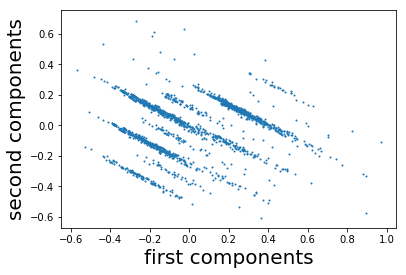

In [6]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

csv_data = pd.read_csv("house.csv")#住宅データを読み込む.

csv_array = min_max_df(csv_data[["sqft_living","sqft_lot","grade","condition","bedrooms","bathrooms","floors"]] )

price_array = min_max(csv_data["price"])

pca = PCA(n_components=2)#何次元に次元削減するか設定

ans = pca.fit(csv_array) #csv_arrayを適用
 
components = ans.components_#主成分を格納

PCA_array = ans.transform(csv_array)#pca.transformで、入力データを各軸を主成分とした空間に射影

plt.scatter(PCA_array[:,0], PCA_array[:,1], s=1)
plt.xlabel("first components", size = 20)
plt.ylabel("second components", size = 20)
plt.show()

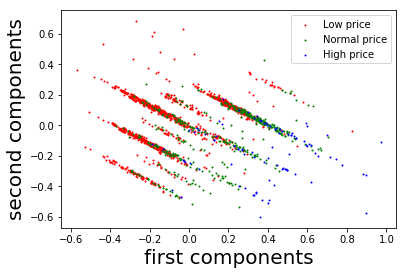

In [7]:
# おまけ問題
class_1 =PCA_array[price_array < 0.1] #クラス1の要素を取得.
class_2 = PCA_array[(price_array >=  0.1)&(price_array <=0.2)]#クラス2の要素取得.
class_3=PCA_array[price_array > 0.2] #クラス3の要素を取得.

plt.scatter(class_1[:,0], class_1[:,1], c = "r", s =1, label = "Low price")#クラス1に赤点.
plt.scatter(class_2[:,0], class_2[:,1], c = "g", s = 1,label = "Normal price")#クラス2に緑点.
plt.scatter(class_3[:,0], class_3[:,1], c = "b", s = 1,label = "High price")#クラス2に緑点.
plt.legend()
plt.xlabel("first components", size = 20)
plt.ylabel("second components", size = 20)
plt.show()